## Dollar Cost Averaging (DCA) in ETF Investing
Dollar cost averaging (DCA) is an investing strategy to manage risk when buying stocks, exchange-traded funds (ETFs) or mutual funds. DCA is often [defined](https://www.investopedia.com/terms/d/dollarcostaveraging.asp) as 'investing the same amount of money in a target security at regular intervals over a certain period of time, regardless of price. By using dollar-cost averaging, investors may lower their average cost per share and reduce the impact of volatility on their portfolios.' 
</br>
</br> In this notebook, the profitability of DCA is compared to buy-and-hold. In addition, we will explore whether the DCA can be augmented by using a popular technical analysis indicator (Moving Average Convergence Divergence - MACD) to minimise the downside. As an example, the strategies will be applied to buying the Vanguard S&P 500 UCITS ETF [VUSA](https://uk.finance.yahoo.com/quote/VUSA.L). The data has been downloaded as a csv from Yahoo Finance.

**Disclaimer:**
- This code is presented for *educational purposes only*. There is no investment advice implied. Do your own due diligence & trade at your own discretion. The code can be used a starting point to develop more advanced strategies, but please don't use it in its current form to execute real trades in the financial markets using your own hard-earned cash (or, worse, someone else's cash).

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
import datetime as dt

### Section 1 - Data Loading

In [2]:
# Load the data for our ETF of interest for the last 5 years

df = pd.read_csv('VUSA.L.csv')
df.sort_values(by='Date')
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,38.959999,39.020000,38.810001,38.950001,38.950001,157665
2018-06-04,39.049999,39.240002,38.980000,39.250000,39.250000,139371
2018-06-05,39.200001,39.279999,39.099998,39.119999,39.119999,92055
2018-06-06,39.169998,39.169998,38.959999,39.150002,39.150002,131097
2018-06-07,39.290001,39.529999,39.230000,39.250000,39.250000,148395


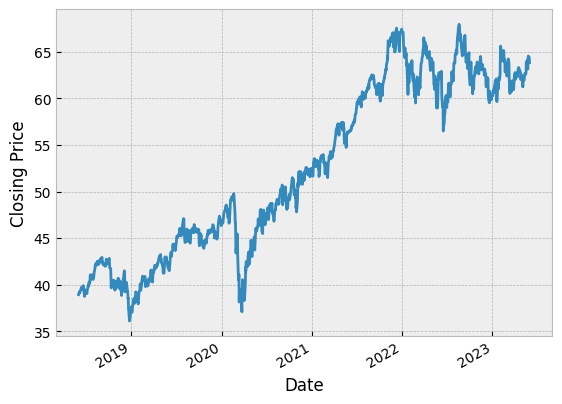

In [3]:
# plot the Closing price to have an idea of the price movement
df['Close'].plot()
plt.ylabel('Closing Price')
plt.show()

In [4]:
# interpolate the data to account for non-trading days
df = df.asfreq('D').interpolate()

# calculate percentage change in the closing price
df['Percent Change'] = df['Close'].pct_change()

### Section 2 - Buy-and-Hold Strategy
First, the buy-and-hold strategy is evaluated to establish a benchmark.

In [5]:
# price at the beginning of the period
print(f"Price at the beginning of investing period: £{round(df['Close'][0],2)}")
# price at the end of the period
print(f"Price at the end of investing period: £{round(df['Close'][-1],2)}")
# increase in price over the period
print(f"Change in price over the investing period: {round((df['Close'][-1]-df['Close'][0])/df['Close'][0]*100,2)}%")

Price at the beginning of investing period: £38.95
Price at the end of investing period: £63.83
Change in price over the investing period: 63.88%


Over the 5-year period from May 2018 - May 2023, the price of VUSA ETF has increase significantly by around 64%. Now, we'll assume that we have bought £12,200-worth of VUSA ETF shares at the beginning of the period. The initial investment would have grown into the following by the end of the period:

In [6]:
total_investment = 12200

buy_n_hold_capital = round((total_investment * df['Close'][-1] / df['Close'][0]),2)
print(f'Investment value at the end of period: £{buy_n_hold_capital}')

# the overall percentage gain will be the following
buy_n_hold_gain = round((100 * (df['Close'][-1] / df['Close'][0] - 1)),2)
print(f'Buy-and-hold strategy gain at the end of period: {buy_n_hold_gain}%')

Investment value at the end of period: £19993.75
Buy-and-hold strategy gain at the end of period: 63.88%


The equity curve can be visualised as follows:

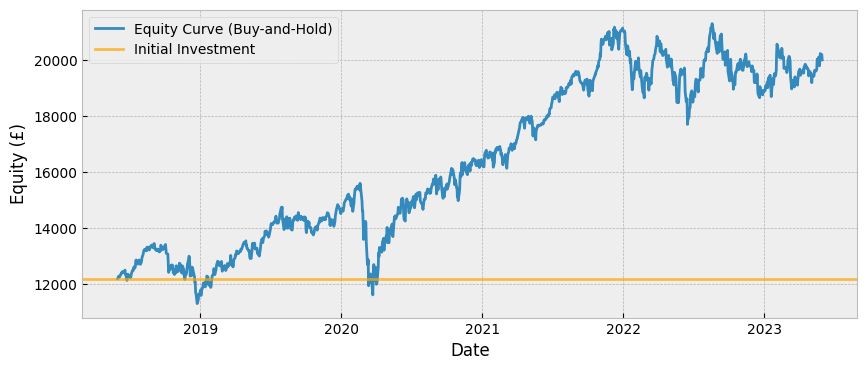

In [7]:
# initiate a new column to calculate the investment value over the 5-year period
df['Investment Value'] = 0

# set the first value as the initial contribution of £12,200
df.iloc[0,-1] = total_investment

# for the subsequent rows, the % change in the investment value is calculated based on the the ETF % price change
for i in range(1,len(df)):
    df.iloc[i,-1] = df['Investment Value'][i-1] * (1 + df['Percent Change'][i])

# plot equity curve using the buy-and-hold strategy
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df['Investment Value'], label = 'Equity Curve (Buy-and-Hold)')
ax.axhline(y=total_investment, color='orange', alpha=0.7, label= 'Initial Investment')
ax.set_ylabel('Equity (£)')
ax.set_xlabel('Date')
plt.legend(loc='upper left')
plt.show()

As expected the equity curve mirrors the price movements of VUSA ETF. The relatively large drawdowns towards the end of 2018 and in the first half of 2020 are apparent.

### Section 2 - Dollar Cost Averaging (DCA) Strategy
In this section, the DCA strategy is evaluated. It is assumed that we invest £200 roughly once per month.

In [8]:
# make a copy of the dataframe just for DCA calculations
df2 = df.copy()
df2 = df2.drop('Investment Value', axis=1)

# define how much we want to invest regularly
monthly_investment = 200

# initialise a new column for monthly investment
df2['Monthly Investment'] = 0

# set to invest every 30 days
for i in range(len(df2)):
    if i == 0 or i % 30 == 0:
        df2.iloc[i,-1] = monthly_investment

# sum all monthly investments at the end of the period
print(f"Total amount invested over the period: £{round(df2['Monthly Investment'].sum(),2)}")

Total amount invested over the period: £12200


Just so that we have a better idea of the price levels we would have bought the shares at, our monthly contributions can be visualised on top of the price as follows:

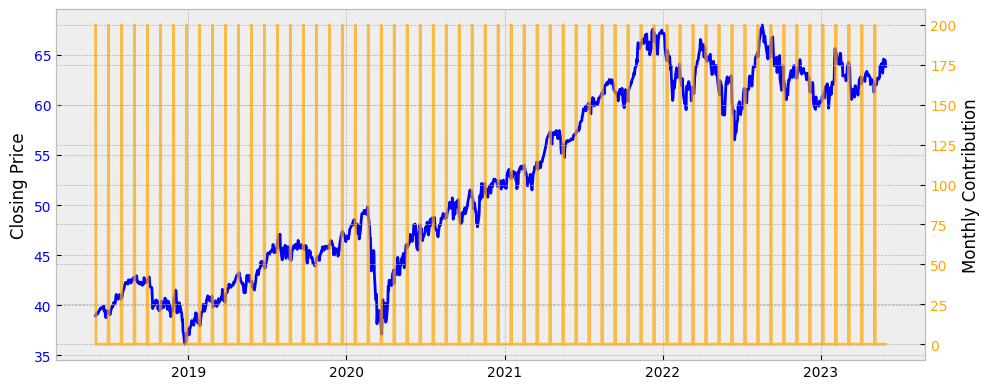

In [9]:
# plot the price & dates when we invest periodically
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(df2['Close'], color = 'blue')
ax1.set_ylabel('Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df2['Monthly Investment'], color = 'orange', alpha = 0.7)
ax2.set_ylabel('Monthly Contribution')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.show()

Over the 5-year investment period, our monthly contributions would have grown into the following:

In [10]:
# initiate a new column to calculate the investment value
df2['Investment Value'] = 0

# set the first value as the initial contribution of £200
df2.iloc[0,-1] = 200

# for the subsequent rows, the % change in the investment value is calculated based on the the ETF % price change
for i in range(1,len(df2)):
    df2.iloc[i,-1] = (df2['Investment Value'][i-1] * (1 + df2['Percent Change'][i])) + df2['Monthly Investment'][i]

dca_capital = round(df2['Investment Value'][-1],2)
print(f"Investment value at the end period (DCA strategy): £{dca_capital}")

dca_gain = round(((df2['Investment Value'][-1] - total_investment) / total_investment * 100),2)
print(f"DCA strategy gain at the end of period: {dca_gain}%")

Investment value at the end period (DCA strategy): £15386.65
DCA strategy gain at the end of period: 26.12%


The equity curve can be visualised as follows:

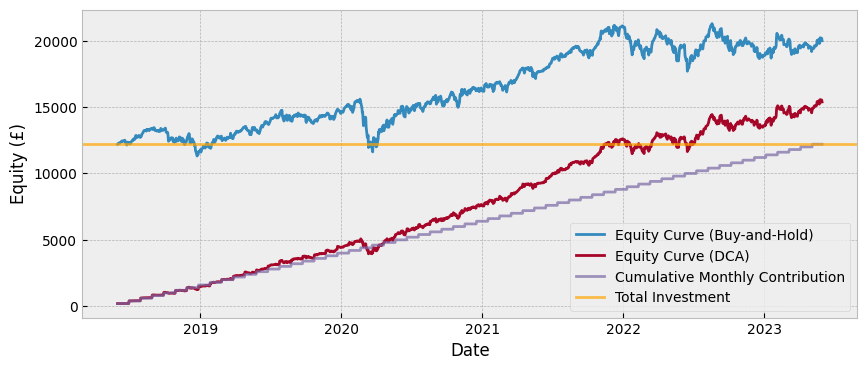

In [11]:
# plot investment values from buy-and-hold and DCA strategies

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df['Investment Value'], label = 'Equity Curve (Buy-and-Hold)')
ax.plot(df2['Investment Value'], label = 'Equity Curve (DCA)')
ax.plot(df2['Monthly Investment'].cumsum(), alpha = 0.7, label = 'Cumulative Monthly Contribution')
ax.axhline(y=total_investment, color='orange', alpha=0.7, label= 'Total Investment')
ax.set_ylabel('Equity (£)')
ax.set_xlabel('Date')
plt.legend(loc='lower right')
plt.show()

Using the DCA approach, our total contribution of £12,200 would have grown by around 26% to £15,386.55. Although the gain is less than the gain from buy-and-hold, the drawdowns seem to have been minimised (especially in the first half of 2020).

### Section 3 - DCA + MACD Approach
In this section, a modified version of the original DCA strategy is evaluated. The idea is to use the MACD indicator to minimise the downside.

In [12]:
# make a copy of the dataframe just for VA calculations
df3 = df.copy()
df3 = df3.drop('Investment Value', axis=1)

# initialise a new column for monthly investment
df3['Monthly Investment'] = 0

# set to invest every 30 days
for i in range(len(df3)):
    if i == 0 or i % 30 == 0:
        df3.iloc[i,-1] = monthly_investment

# sum all monthly investments at the end of the period
print(f"Total amount invested over the period: £{round(df3['Monthly Investment'].sum(),2)}")

Total amount invested over the period: £12200


In [13]:
# define a function for the MACD indicator
def MACD(data, slow_ema = 26, fast_ema = 12, smooth_ema = 9):
    
    data['slow_EMA'] = data['Close'].ewm(span=slow_ema, adjust=False, min_periods=slow_ema).mean()
    data['fast_EMA'] = data['Close'].ewm(span=fast_ema, adjust=False, min_periods=fast_ema).mean()

    data['MACD'] = data['fast_EMA'] - data['slow_EMA']
    data['Signal'] = data['MACD'].ewm(span=smooth_ema, adjust=False, min_periods=smooth_ema).mean()
    data['MACD_Histogram'] = data['MACD'] - data['Signal']

    return(data)

# call the MACD function
df3 = MACD(df3)

In [14]:
# now, buy and sell signals are generated.
# first, initiate the position tracker
df3['position_tracker'] = ''

# define the entry & exit signals
entry_signal = df3['MACD_Histogram'] > 0
exit_signal = df3['MACD_Histogram'] < 0

# set position tracker as 1 at entry & set back to 0 upon selling
df3['position_tracker'] = np.where(exit_signal, 0, np.nan)
df3['position_tracker'] = np.where(entry_signal, 1, df3['position_tracker'])
df3['position_tracker'].ffill(inplace=True)
df3['position_tracker'].fillna(0,inplace=True)

# record the price when position == 1
df3['in_position'] = np.where(df3['position_tracker'] == 1, df3['Close'], np.nan)

To gain a better understanding of when we bought and sell the shares based on the MACD signals, the visualisation below is created:

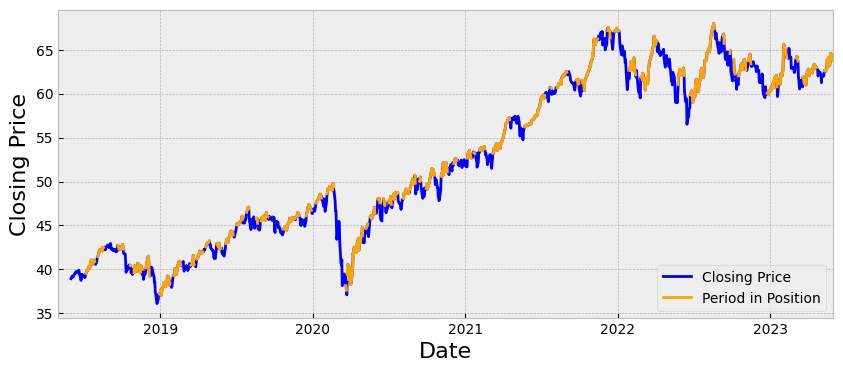

In [15]:
# visualise the close prices for the stock
start_date = dt.datetime(2018,5,1)
end_date = dt.datetime(2023,6,1)

# visualise the buy & sell signals on the price chart
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df3['Close'], label='Closing Price', color = 'blue')
ax.plot(df3['in_position'], label = 'Period in Position', color='orange')
plt.xlim(left=start_date, right=end_date)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(loc='lower right')
plt.show()

Although the MACD indicator is not 100% accurate, using the indicator, we would have avoided major periods of drawdowns by selling out before the drops occurred.
</br>Over the 5-year investment period, our monthly contributions would have grown into the following:

In [16]:
# calculate the percent price change when we're in position
df3['pct_change_in_position'] = df3['position_tracker'] * df3['Percent Change']

# change the position tracker to 1 upon exit to get a more realistic sell price
for i in range(len(df3)):
    if (df3['position_tracker'][i] == 0) and (df3['position_tracker'][i-1] == 1):
        df3.iloc[i,-1] = df3['position_tracker'][i-1] * df3['Percent Change'][i]

# calculate cumulative value of investment
df3['Investment Value'] = 0

# set the first value to 200
df3.iloc[0,-1] = 200

# set the value for the rest
for i in range(1,len(df3)):
    df3.iloc[i,-1] = (df3['Investment Value'][i-1] * (1 + df3['pct_change_in_position'][i])) + df3['Monthly Investment'][i]

In [17]:
dca_macd_capital = round(df3['Investment Value'][-1],2)
print(f"Investment value at the end period (DCA + MACD strategy): £{dca_macd_capital}")

dca_macd_gain = round(((df3['Investment Value'][-1] - total_investment) / total_investment * 100),2)
print(f"DCA + MACD strategy gain at the end of period: {dca_macd_gain}%")

Investment value at the end period (DCA + MACD strategy): £19588.55
DCA + MACD strategy gain at the end of period: 60.56%


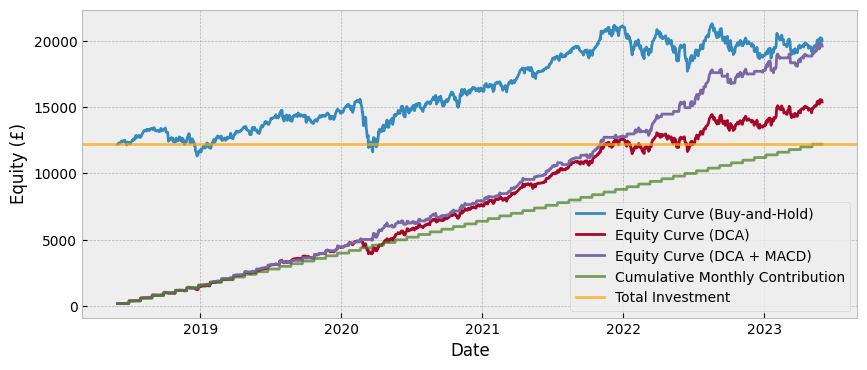

In [18]:
# plot investment values from all 3 strategies

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df['Investment Value'], label = 'Equity Curve (Buy-and-Hold)')
ax.plot(df2['Investment Value'], label = 'Equity Curve (DCA)')
ax.plot(df3['Investment Value'], label = 'Equity Curve (DCA + MACD)')
ax.plot(df2['Monthly Investment'].cumsum(), alpha = 0.7, label = 'Cumulative Monthly Contribution')
ax.axhline(y = total_investment, color='orange', alpha=0.7, label= 'Total Investment')
ax.set_ylabel('Equity (£)')
ax.set_xlabel('Date')
plt.legend(loc='lower right')
plt.show()

Using the DCA + MACD approach, our total contribution of £12,200 would have grown by 60.56% to £19,588.55. The gain is similar to the gain from buy-and-hold and, as in the original DCA strategy, the drawdowns seem to have been minimised throughout the 5-year investment period.

### Summary

In [19]:
summary = pd.DataFrame({'Strategy': ['Buy-and-Hold','DCA','DCA + MACD'],
                        'End Equity (£)': [buy_n_hold_capital, dca_capital, dca_macd_capital],
                        'Gain (%)': [buy_n_hold_gain, dca_gain, dca_macd_gain]})
summary

,Strategy,End Equity (£),Gain (%)
0,Buy-and-Hold,19993.75,63.88
1,DCA,15386.65,26.12
2,DCA + MACD,19588.55,60.56


- Many seasoned investors, including Warren Buffett, promote DCA as an easy investing plan for the common folks to follow because it keeps investors consistent and that they can buy good shares at a cheaper during bear-ish periods.
- From this quick analysis, the plain DCA strategy has been found to be profitable, especially when buying VUSA ETF shares (which did go up in price substantially over the 5-year test period).
- However, as is often mentioned by critics of DCA, the strategy is not as profitable as buy-and-hold, especially in the bull market (as this analysis has shown as well). Nonetheless, given that common investors probably don't have a large lump sum of money to invest, DCA can still be a good strategy.
- To begin to investigate if a common technical analysis indicator can be used to minimise the drawdowns and give the plain old DCA a little boost, this analysis has found that buying and selling based on MACD signals can further improve the profitability of DCA.
- A glaringly obvious caveat here is that transaction costs and other fees have not been included in the analysis. Therefore, further studies will be required.
- Again, as mentioned above, this is NOT an investment advice. Trade at your own discretions.